# a scrapped together guide on how to make a Unet for cell segmentation by jamil

So lets start off with of course the imports, very pretty very nice!

and then we want to specify the location where the test and training data is and save it to image_location,
image is the training images, labels are the training images output and test is the test file!

In [1]:
from __future__ import print_function

from matplotlib import pyplot as plt
from keras import losses
import os
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam
import cv2
import numpy as np
# training data 
image_location = "C:/Users/JamilG-Lenovo/Desktop/"
image = image_location+"train/image"
label = image_location +"train/label"
test = image_location +"test"


Using TensorFlow backend.


lets create a simple data structure to hold the training data, send in the directory where the training images and label is

In [2]:
class train_data():
    
    def __init__(self, image, label):
        self.image = []
        self.label = []
        for file in os.listdir(image):
            if file.endswith(".tif"):
                self.image.append(cv2.imread(image+"/"+file,0))
        
        for file in os.listdir(label):
            if file.endswith(".tif"):
                #print(label+"/"+file)
                self.label.append(cv2.imread(label+"/"+file,0))
    
    def get_image(self):
        return np.array(self.image)
    
    def get_label(self):
        return np.array(self.label)
    

same as above, but for the testing

In [3]:
class test_data():
    
    def __init__(self, test):
        self.test_Images = []
        for file in os.listdir(test):
            if file.endswith(".tif"):
                self.test_Images.append(cv2.imread(image+"/"+file,0))

    def get_data(self):
        return np.array(self.test_Images)

    
    


design the Unet (no clue)

In [4]:

def get_unet(rows, cols):
    inputs = Input((rows, cols, 1))
    print("Input  : " + str(inputs))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)
    print("Output : " + str(conv10))
    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-5), loss = losses.mean_squared_error)

    return model



load in the data to the different data structures

In [5]:
train_set = train_data(image, label)
test_set = test_data(test)
test_info = test_set.get_data()
# get the training image
train_images = train_set.get_image()
# get the segmented image
train_label = train_set.get_label()


In [6]:
unet = get_unet(train_label[0].shape[0],
                    train_label[0].shape[1])
    
train_images = train_images.reshape(30,512,512,1)
train_label = train_label.reshape(30,512,512,1)
print("reshape:-------------------------\n\n")
print("type of train_images" + str(type(train_images[0])))
print("type of train_label" + str(type(train_label[0])))
print('\n')
print("shape of train_images" + str(train_images.shape))
print("shape of train_label" + str(train_label.shape))
print('\n')
print("shape of train_images[0]" + str(train_images[0].shape))
print("shape of train_label[0]" + str(train_label[0].shape))


Input  : Tensor("input_1:0", shape=(?, 512, 512, 1), dtype=float32)
Output : Tensor("conv2d_19/Sigmoid:0", shape=(?, 512, 512, 1), dtype=float32)
reshape:-------------------------


type of train_images<class 'numpy.ndarray'>
type of train_label<class 'numpy.ndarray'>


shape of train_images(30, 512, 512, 1)
shape of train_label(30, 512, 512, 1)


shape of train_images[0](512, 512, 1)
shape of train_label[0](512, 512, 1)


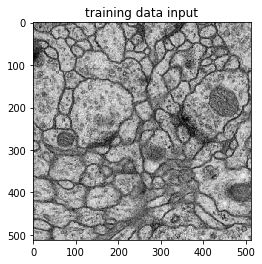

In [7]:
plt.imshow(train_images[0].reshape(512,512), interpolation='nearest', cmap='gray')
plt.title("training data input")
plt.show()
    

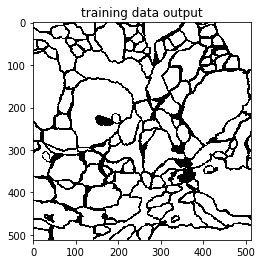

In [8]:
plt.imshow(train_label[0].reshape(512,512), interpolation='nearest', cmap='gray')
plt.title("training data output")
plt.show()

In [9]:
#unet.load_weights('Unet.h5')
for i in range(1):
    unet.fit(train_images, train_label, validation_data=
       (train_images, train_label), epochs=1, batch_size=3)
    unet.save('Unet.h5')

Train on 30 samples, validate on 30 samples
Epoch 1/1
30/30 [==============================] - 392s - loss: 50344.5211 - val_loss: 50343.7602


(30, 512, 512)


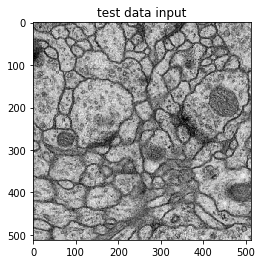

In [10]:
print(test_info.shape)
plt.imshow(test_info[0], interpolation='nearest', cmap='gray')
plt.title("test data input")
plt.show()

In [11]:
test_info = test_info.reshape(30,512,512,1)
print('in')
prediction = unet.predict(test_info)
print("prediction shape: " + str(prediction.shape))
print(str(type(prediction)))
print("prediction[0] shape: " + str(prediction[0].shape))
print("reshape")


in
prediction shape: (30, 512, 512, 1)
<class 'numpy.ndarray'>
prediction[0] shape: (512, 512, 1)
reshape


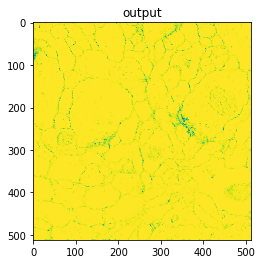

In [15]:
test_label = prediction[0]
test_label = test_label.reshape(512,512)
plt.imshow(test_label)
plt.title("output")
plt.show()